In [68]:
import glob
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# AuntoML인 pycaret 사용해서 적절한 모델 비교
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

# 파일 경로 패턴 지정하여 CSV 파일들을 검색
file_pattern = './*Total.csv'
csv_files = glob.glob(file_pattern)

# 각 CSV 파일을 읽어들여서 리스트에 저장
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding = 'utf-8')
    dfs.append(df)

# 리스트에 저장된 모든 데이터프레임을 하나로 병합
Transfer_df = pd.concat(dfs, ignore_index=True)

# 병합된 데이터프레임을 CSV 파일로 저장
Transfer_df.to_csv('Transfer_value_data.csv', index=False)

In [8]:
Transfer_df = pd.read_csv('Transfer_value_data.csv', encoding = 'utf-8')
Transfer_df

,leagueNation,league,team name,num,name,age,nationality,position,market value
0,England,EPL,Manchester City,31,Ederson,30,Brazil,Goalkeeper,€40.00m
1,England,EPL,Manchester City,18,Stefan Ortega,31,Germany,Goalkeeper,€9.00m
2,England,EPL,Manchester City,33,Scott Carson,38,England,Goalkeeper,€200k
3,England,EPL,Manchester City,3,Rúben Dias,26,Portugal,Centre-Back,€80.00m
4,England,EPL,Manchester City,24,Josko Gvardiol,22,Croatia,Centre-Back,€75.00m
...,...,...,...,...,...,...,...,...,...
12907,Spain,Segunda Federación - Grupo I,CD Cayón,10,Marcos Sáez,34,Spain,Attacking Midfield,€25k
12908,Spain,Segunda Federación - Grupo I,CD Cayón,11,Jesús Villar,22,Spain,Right Winger,€100k
12909,Spain,Segunda Federación - Grupo I,CD Cayón,18,Héctor Alonso,30,Spain,Right Winger,€25k
12910,Spain,Segunda Federación - Grupo I,CD Cayón,20,Dani Salas,24,Spain,Centre-Forward,€100k


#### 포지션별로 데이터프레임 나누기

In [10]:
# 골키퍼 포지션 나누기
Transfer_df_GK = Transfer_df[Transfer_df['position']=='Goalkeeper']
Transfer_df_GK.to_csv('Transfer_df_GK.csv', index=False)

#### 수비수 포지션 나누기

In [15]:
Transfer_df['position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Left Midfield', 'Right Midfield', 'Midfielder', 'Striker',
       'Defender'], dtype=object)

In [21]:
# 수비수 포지션 나누기
for i, x in enumerate(Transfer_df['position']):
    if x in ['Centre-Back', 'Left-Back', 'Right-Back', 'Defender']:
        Transfer_df.iloc[i, 7] = 'DC'
    elif x in ['Defensive Midfield', 'Central Midfield', 'Attacking Midfield','Left Winger', 'Right Winger','Left Midfield', 'Right Midfield', 'Midfielder']:
        Transfer_df.iloc[i, 7] = 'MID'
    elif x in ['Second Striker', 'Centre-Forward','Striker']:
        Transfer_df.iloc[i, 7] = 'ST'
    else:
        Transfer_df.iloc[i, 7] = 'GK'

In [22]:
Transfer_df['position']

0         GK
1         GK
2         GK
3         DC
4         DC
        ... 
12907    MID
12908    MID
12909    MID
12910     ST
12911     ST
Name: position, Length: 12912, dtype: object

In [23]:
Transfer_df_GK = Transfer_df[Transfer_df['position']=='GK']
Transfer_df_GK.to_csv('Transfer_df_GK.csv', index=False)

Transfer_df_DC = Transfer_df[Transfer_df['position']=='DC']
Transfer_df_DC.to_csv('Transfer_df_DC.csv', index=False)

Transfer_df_MID = Transfer_df[Transfer_df['position']=='MID']
Transfer_df_MID.to_csv('Transfer_df_MID.csv', index=False)

Transfer_df_ST = Transfer_df[Transfer_df['position']=='ST']
Transfer_df_ST.to_csv('Transfer_df_ST.csv', index=False)

#### 수비수 team name칼럼으로 맵핑해서 fm데이터 끌어다 붙이기

In [27]:
Transfer_df_DC = pd.read_csv('Transfer_df_DC.csv', encoding = 'utf-8')
Transfer_df_DC

,leagueNation,league,team name,num,name,age,nationality,position,market value
0,England,EPL,Manchester City,3,Rúben Dias,26,Portugal,DC,€80.00m
1,England,EPL,Manchester City,24,Josko Gvardiol,22,Croatia,DC,€75.00m
2,England,EPL,Manchester City,25,Manuel Akanji,28,Switzerland,DC,€42.00m
3,England,EPL,Manchester City,6,Nathan Aké,29,Netherlands,DC,€40.00m
4,England,EPL,Manchester City,5,John Stones,29,England,DC,€38.00m
...,...,...,...,...,...,...,...,...,...
4283,Spain,Segunda Federación - Grupo I,CD Cayón,3,Álvaro Díez,21,Spain,DC,€25k
4284,Spain,Segunda Federación - Grupo I,CD Cayón,15,Riki Fernández,23,Spain,DC,€100k
4285,Spain,Segunda Federación - Grupo I,CD Cayón,2,Gabi Fernández,24,Spain,DC,€50k
4286,Spain,Segunda Federación - Grupo I,CD Cayón,17,Álvaro Santamaría,19,Spain,DC,€25k


In [32]:
# 값 변환 함수 정의
def convert_value(value):
    # 정규 표현식을 사용하여 숫자 부분 추출
    numbers = re.findall(r'\d+\.\d+|\d+', value)
    if numbers:
        number = float(numbers[0])
        if 'm' in value:
            return number * 1000000
        elif 'k' in value:
            return number * 1000
        else:
            return number
    else:
        return None

# market value 칼럼에 함수 적용하여 변환된 값으로 칼럼 값 갱신
Transfer_df_DC['market value'] = Transfer_df_DC['market value'].apply(convert_value)

#### 모든 포지션 파일들 market value 단위 수정

In [35]:
Transfer_df_MID = pd.read_csv('Transfer_df_MID.csv', encoding = 'utf-8')
Transfer_df_ST = pd.read_csv('Transfer_df_ST.csv', encoding = 'utf-8')

In [36]:
# market value 칼럼에 함수 적용하여 변환된 값으로 칼럼 값 갱신
Transfer_df_MID['market value'] = Transfer_df_MID['market value'].apply(convert_value)
Transfer_df_ST['market value'] = Transfer_df_ST['market value'].apply(convert_value)

In [37]:
Transfer_df_DC.to_csv('Transfervalue_df_DC.csv', index = False)
Transfer_df_MID.to_csv('Transfervalue_df_MID.csv', index = False)
Transfer_df_ST.to_csv('Transfervalue_df_ST.csv', index = False)

In [38]:

Transfer_df_MID = pd.read_csv('Transfervalue_df_MID.csv', encoding = 'utf-8')
Transfer_df_MID

,leagueNation,league,team name,num,name,age,nationality,position,market value
0,England,EPL,Manchester City,16,Rodri,27,Spain,MID,110000000.0
1,England,EPL,Manchester City,27,Matheus Nunes,25,Portugal,MID,50000000.0
2,England,EPL,Manchester City,8,Mateo Kovacic,29,Croatia,MID,30000000.0
3,England,EPL,Manchester City,20,Bernardo Silva,29,Portugal,MID,80000000.0
4,England,EPL,Manchester City,17,Kevin De Bruyne,32,Belgium,MID,60000000.0
...,...,...,...,...,...,...,...,...,...
5286,Spain,Segunda Federación - Grupo I,CD Cayón,14,Javier Turrado,28,Spain,MID,25000.0
5287,Spain,Segunda Federación - Grupo I,CD Cayón,7,Carlos Cagigas,33,Spain,MID,25000.0
5288,Spain,Segunda Federación - Grupo I,CD Cayón,10,Marcos Sáez,34,Spain,MID,25000.0
5289,Spain,Segunda Federación - Grupo I,CD Cayón,11,Jesús Villar,22,Spain,MID,100000.0


In [41]:
Transfer_df_all = pd.concat([Transfer_df_DC, Transfer_df_MID, Transfer_df_ST], axis =0)
Transfer_df_all.reset_index(drop=True, inplace=False)

,leagueNation,league,team name,num,name,age,nationality,position,market value
0,England,EPL,Manchester City,3,Rúben Dias,26,Portugal,DC,80000000.0
1,England,EPL,Manchester City,24,Josko Gvardiol,22,Croatia,DC,75000000.0
2,England,EPL,Manchester City,25,Manuel Akanji,28,Switzerland,DC,42000000.0
3,England,EPL,Manchester City,6,Nathan Aké,29,Netherlands,DC,40000000.0
4,England,EPL,Manchester City,5,John Stones,29,England,DC,38000000.0
...,...,...,...,...,...,...,...,...,...
11480,Spain,Segunda Federación - Grupo I,CD Covadonga,9,Ariel Herrero,24,Spain,ST,150000.0
11481,Spain,Segunda Federación - Grupo I,CD Covadonga,11,Samu Pérez,22,Spain,ST,100000.0
11482,Spain,Segunda Federación - Grupo I,CD Covadonga,15,Adrián Turmo,23,Spain,ST,50000.0
11483,Spain,Segunda Federación - Grupo I,CD Cayón,20,Dani Salas,24,Spain,ST,100000.0


In [42]:
Transfer_df_all.to_csv('Transfervalue_df_all.csv', index=False)

#### 수비수 몸값 예측

In [78]:
# Transfer_df_all 에서 position별로 나눈 데이터중 수비수인 DC의 몸값 예측
Market_value_DC = pd.read_csv('market_value_DC.csv')
Market_value_DC

,name,market value,player_overall,player_potential,player_team,player_country,position,player_age,player_foot,player_height,...,vision,work-rate,acceleration,agility,balance,jumping-reach,natural-fitness,pace,stamina,strength
0,Rúben Dias,80000000.0,87,89.0,Manchester City,Portugal,DC,26,Right,186,...,13,17,13,13,12,16,18,13,18,16
1,Manuel Akanji,42000000.0,77,78.0,Manchester City,Others,DC,27,Right,187,...,13,13,14,13,13,15,13,15,14,17
2,Nathan Aké,40000000.0,78,82.0,Manchester City,Netherlands,DC,28,Left,180,...,13,16,15,14,13,12,14,15,15,15
3,John Stones,38000000.0,83,85.0,Manchester City,England,DC,29,Right,188,...,14,17,14,13,12,16,16,15,16,15
4,Sergio Gómez,10000000.0,66,79.0,Manchester City,Spain,DC,22,Left,171,...,14,14,14,13,7,6,12,14,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,Yuri,100000.0,60,60.0,Neftçi,Brazil,DC,28,Right,186,...,9,14,12,12,14,13,13,12,12,14
2173,Yuri,100000.0,54,59.0,Athletic Club (MG),Brazil,DC,27,Left,173,...,11,13,13,13,13,8,13,13,12,9
2174,Roberto Fernández,600000.0,59,70.0,Dinamo Moscow,Paraguay,DC,23,Left,188,...,9,16,13,10,14,14,12,13,14,13
2175,Roberto Fernández,600000.0,57,65.0,Bolívar,Others,DC,23,Left,177,...,11,11,13,12,11,9,15,13,14,9


In [79]:
Market_value_DC = pd.DataFrame(Market_value_DC[['player_overall', 'player_potential', 'market value']])
Market_value_DC

,player_overall,player_potential,market value
0,87,89.0,80000000.0
1,77,78.0,42000000.0
2,78,82.0,40000000.0
3,83,85.0,38000000.0
4,66,79.0,10000000.0
...,...,...,...
2172,60,60.0,100000.0
2173,54,59.0,100000.0
2174,59,70.0,600000.0
2175,57,65.0,600000.0


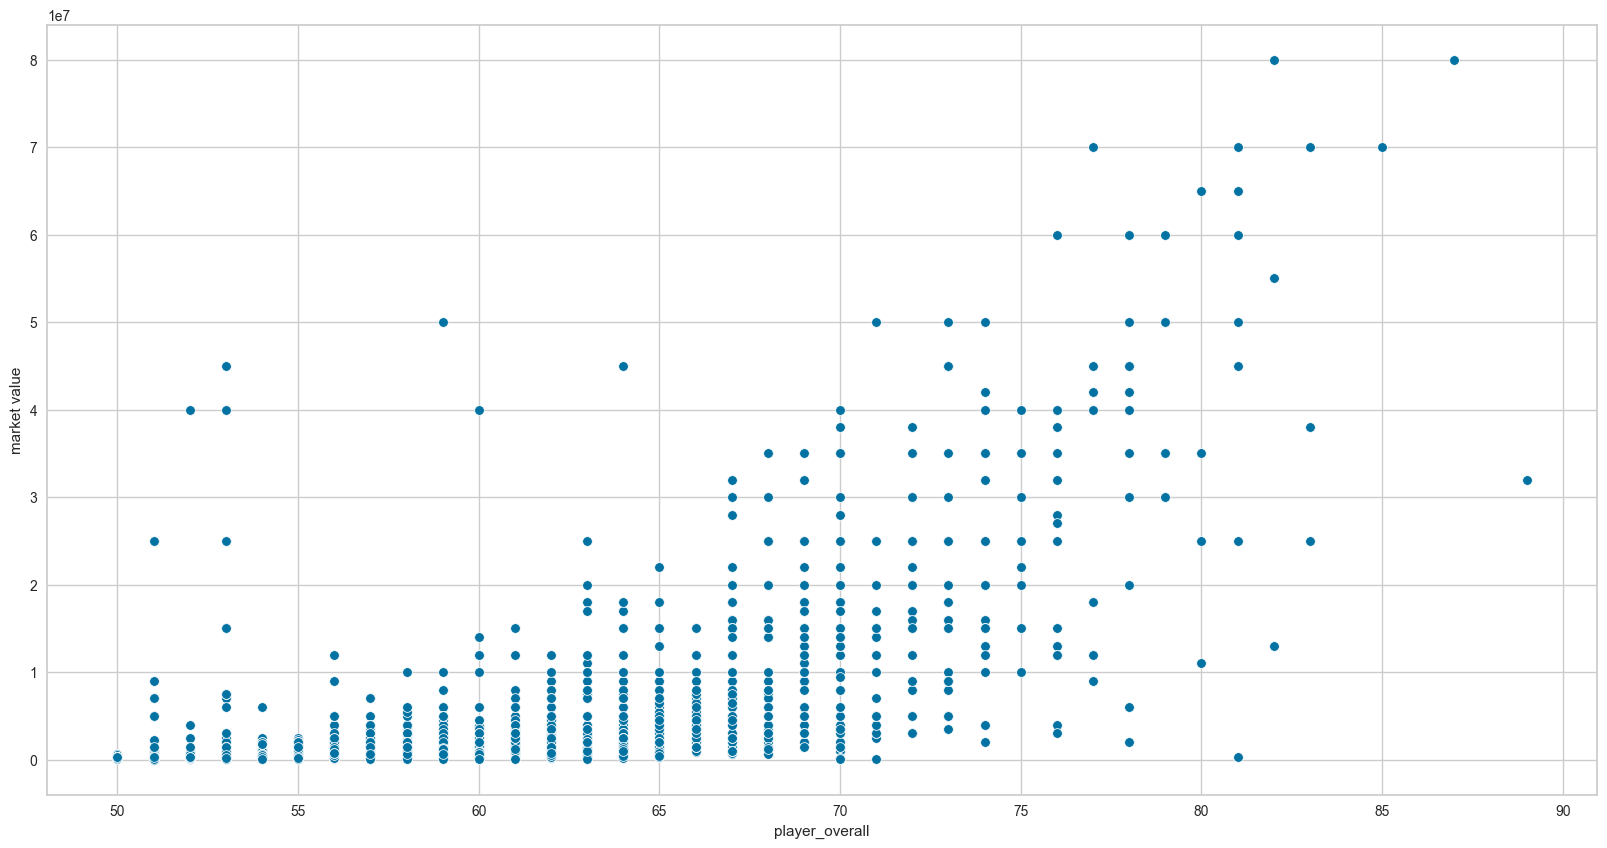

<Figure size 800x550 with 0 Axes>

In [80]:
# 타겟값 이상치 확인
f,axes = plt.subplots(1, 1, figsize=(20,10))
sns.scatterplot(x=Market_value_DC['player_overall'], y=Market_value_DC['market value'])
plt.show()
plt.tight_layout()

In [83]:
# overall이 65이하이고 market value가 10000000이상인 값들 삭제
# overall이 75 이상이고 market value가 10000000 이하인 값들 삭제
# overall이 80이상이고 market value가 30000000이하인 값들
Market_value_DC.drop(Market_value_DC[(Market_value_DC['player_overall'] <= 65) & (Market_value_DC['market value'] >= 10000000)].index, axis=0, inplace=True)
Market_value_DC.drop(Market_value_DC[(Market_value_DC['player_overall'] >= 75) & (Market_value_DC['market value'] <= 10000000)].index, axis=0, inplace=True)
Market_value_DC.drop(Market_value_DC[(Market_value_DC['player_overall'] >= 80) & (Market_value_DC['market value'] >= 30000000)].index, axis=0, inplace=True)
Market_value_DC

,player_overall,player_potential,market value
1,77,78.0,42000000.0
2,78,82.0,40000000.0
4,66,79.0,10000000.0
5,72,84.0,38000000.0
6,82,82.0,13000000.0
...,...,...,...
2172,60,60.0,100000.0
2173,54,59.0,100000.0
2174,59,70.0,600000.0
2175,57,65.0,600000.0


In [84]:
# 결측치 확인
Market_value_DC.isna().sum()

player_overall       0
player_potential     0
market value        10
dtype: int64

In [85]:
# 결측치가 존재해 market value의 평균값으로 매우겠음 -- R2
#mean_market_value = np.mean(Market_value_DC['market value'])
#Market_value_DC['market value'].fillna(mean_market_value, inplace=True)
# 결측치 다시 확인
#Market_value_DC.isna().sum()


# 결측치 없애기
Market_value_DC.dropna(axis=0, inplace=True)
# 결측치 다시 확인
Market_value_DC.isna().sum()

player_overall      0
player_potential    0
market value        0
dtype: int64

In [86]:
# 칼럼들 타입 확인 -- player_overall 칼럼만 int타입이므로 float타입으로 바꿔주겠음
Market_value_DC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 1 to 2176
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_overall    2098 non-null   int64  
 1   player_potential  2098 non-null   float64
 2   market value      2098 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 65.6 KB


In [87]:
Market_value_DC['player_overall'] = Market_value_DC['player_overall'].astype(float)
Market_value_DC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 1 to 2176
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_overall    2098 non-null   float64
 1   player_potential  2098 non-null   float64
 2   market value      2098 non-null   float64
dtypes: float64(3)
memory usage: 65.6 KB


In [88]:
# pycaret을 이용해서 최적의 모델 구하기
X_train, X_test = train_test_split(Market_value_DC, train_size = 0.7, random_state =123)
Marketvalue = setup(data = X_train, target = 'market value',test_data = X_test, session_id = 123)

,Description,Value
0,Session id,123
1,Target,market value
2,Target type,Regression
3,Original data shape,"(2098, 3)"
4,Transformed data shape,"(2098, 3)"
5,Transformed train set shape,"(1468, 3)"
6,Transformed test set shape,"(630, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [90]:
# 모델들 비교
best = compare_models()
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:39:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2022702.6865,20588687564503.9531,4468853.5134,0.6344,0.8717,1.4105,0.0130
knn,K Neighbors Regressor,2103795.2500,21361007368601.6016,4543034.1500,0.6189,0.8855,1.3357,0.0100
lightgbm,Light Gradient Boosting Machine,2083972.9450,21758540748018.7617,4566932.6533,0.6139,0.8722,1.3689,0.1340
ada,AdaBoost Regressor,2345878.1002,23121950913662.8359,4706385.6993,0.5973,1.0905,2.2079,0.0080
rf,Random Forest Regressor,2132702.8549,22435686715411.7891,4690552.3620,0.5915,0.8905,1.3733,0.0280
et,Extra Trees Regressor,2190058.0116,24057388057301.6602,4881718.5165,0.5503,0.9260,1.3854,0.0230
dt,Decision Tree Regressor,2345841.5941,30012865207552.8047,5431852.8017,0.4538,0.9352,1.3838,0.0050
en,Elastic Net,3524892.0750,32785090320793.6016,5619460.3000,0.4454,1.5197,4.9903,0.0060
llar,Lasso Least Angle Regression,3538964.1000,32784951489331.1992,5620383.3000,0.4448,1.5339,5.0364,0.0050
lasso,Lasso Regression,3538964.2250,32784953796198.3984,5620383.5000,0.4448,1.5339,5.0364,0.0070


GradientBoostingRegressor(random_state=123)

In [91]:
# 모델 생성하기
GBR = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2021441.7365,18891803750107.0000,4346470.2633,0.7102,0.9492,1.4524


In [92]:
# 모델 튜닝
tuned_GBR = tune_model(GBR, optimize = 'RMSE', n_iter = 200)
tuned_GBR

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1529215.9879,11023928605717.1914,3320230.2037,0.4842,0.8574,1.2193
1,1612574.3787,11958388880523.5176,3458090.3517,0.6719,0.8871,1.0894
2,1430046.4454,12459140535787.7070,3529750.7753,0.7849,0.8341,1.1818
3,2565853.2049,30198620168678.5742,5495327.1212,0.6473,0.9301,2.0219
4,2233012.4641,19063354626337.2852,4366160.1696,0.7762,0.8437,1.1764
5,2161892.9585,20746776826421.3008,4554862.9866,0.5494,0.9162,1.4697
6,2496384.9135,28986059410239.1680,5383870.3003,0.4714,1.0308,2.3774
7,1486834.8072,8375916067987.8994,2894117.4938,0.8043,0.7865,1.2693
8,2496259.5109,30195183763005.7852,5495014.4461,0.7302,0.8640,1.1994


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GradientBoostingRegressor(learning_rate=0.5, max_depth=1, max_features='log2',
                          min_impurity_decrease=0.01, min_samples_leaf=5,
                          min_samples_split=7, n_estimators=80,
                          random_state=123, subsample=0.95)

In [93]:
# 마지막 학습(Finalize) 시키기
# R2 0.7134
# finalize_model(): 최종 모델로 설정 후 마지막 학습 진행
# predict_model(): 예측 결과를 'Label' 변수에 저장
final_model = finalize_model(GBR)
pred = predict_model(final_model, data = X_test)
pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1717509.2560,11813674170345.6738,3437102.5836,0.8188,0.9144,1.3658


,player_overall,player_potential,market value,prediction_label
1929,53.0,58.0,200000.0,3.992881e+05
600,62.0,68.0,4000000.0,2.355086e+06
1420,55.0,60.0,650000.0,4.416747e+05
730,58.0,60.0,250000.0,7.829691e+05
680,53.0,66.0,600000.0,6.044046e+05


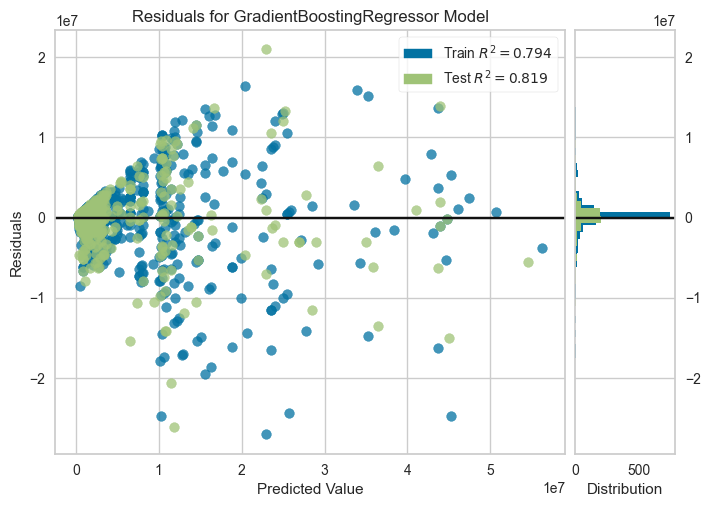

In [94]:
# final모델 Training Score와 Cross Validation Score 시각화
plot_model(final_model)

In [95]:
# 모델 저장
save_model(final_model, './DC_market_value_final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['player_overall',
                                              'player_potential'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  GradientBoostingRegressor(random_state=123))]),
 './DC_market_value_final_model.pkl')